# Using shapely to create, access, manipulate and analysse geometric objects 

Shapely can perform many useful operations on geometries, and provides a range of attributes of geometries. For instance, you can:

- create lines and polygons from a set of points 
- calculate the area, length, perimeter, etc,. of geometries 
- perform geometric operations on a set of geometries, for instance, merging (`union`), substracting (`difference`), or calculating the distance between geometries. 
- query the relationship between geometries, i.e., find out whether two geometries intersect, touch, cross, etc. 

### Installating Shapely 

_This step is based on the [shapely documentation](https://shapely.readthedocs.io/en/stable/)_

> Make sure you are in the `hsvg245` environment (depending on what you named it in the [previous step](create_conda_env.ipynb))

If you have not yet done so, you can install **Shapely** through `pip` or `conda`: 

Run the following commands 

```
$ pip install shapely
# or using conda 
$ conda install shapely --channel conda-forge 
``` 

You can also use pip in the Notebook like so: 


In [1]:
!pip install shapely 

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 435.7 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 406.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 751.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 774.0 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 841.6 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 841.6 kB/s eta 0:00:02
   ----- -

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bqplot 0.12.42 requires ipywidgets<9,>=7.5.0, which is not installed.
folium 0.15.1 requires requests, which is not installed.
matplotlib 3.8.2 requires pillow>=8, which is not installed.
pandas 2.2.0 requires tzdata>=2022.7, which is not installed.


## Creating `Point` Geometries and accesing their properties 

Creating a point geometry object is easy: simply pass coordinates _(x, y, and optional z)_ to the constructor.  

In [2]:
# import shapely.geometry.point # import shapely Point class 
from shapely.geometry import Point 

# Create Point objects: 
harare = Point(-17.81636, 30.72721)
gweru = Point(-19.4553, 29.65041)
mutare = Point(-18.9797, 32.56603, 1120) # => this point is in 3D 
bulawayo = Point(-20.13133, 28.26548)

Let's see what these variables contain: 

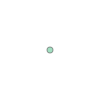

In [3]:
harare

As we can see, Jupyter notebook is able to display the shape directly on the screen.

Alternatively, use a `print` statement to show the text representation of a shapely geometry object:

In [5]:
print(harare)
print(gweru)
print(mutare)

POINT (-17.81636 30.72721)
POINT (-19.4553 29.65041)
POINT Z (-18.9797 32.56603 1120)


This text representation is in [‘Well-Known Text’ (WKT) format](https://en.wikipedia.org/wiki/Well-Known_Text/), a standard set forward in the [Open Geospatial Consortium’s (OGC)](https://www.ogc.org/) [Simple Feature Access](https://www.ogc.org/standards/sfa). This includes the additional letter ‘Z’ that marks the three-dimensional version of a geometry (e.g., `mutare`).

Let’s also check the data type of a point:

In [6]:
type(gweru)

shapely.geometry.point.Point

We can see that the type of the point is a `shapely.geometry.point.Point` (which is equivalent to `shapely.geometry.Point`, the class we used to instantiate the point object).

Under the hood, shapely uses [GEOS](https://osgeo.org/projects/geos/) to handle geometry objects. GEOS is a C++ library (much faster than Python code), and is one of the fundamental pillars of the open source GIS world, powering geospatial processing for many projects, including [QGIS](https://qgis.org/).


### Point properties and methods 

Points and other shapely geometry objects have useful built-in [properties and methods](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods). Using the available attributes, we can for example extract the coordinate values of a Point and calculate the Euclidian distance between points.

The `geom_type` property contains information about the geometry type of a shapely geometry:

In [7]:
gweru.geom_type

'Point'

There are multiple ways to access the coordinates of geometry object. For instance, `coords` is a `shapely.coords.CoordinateSequence`. It is an `Iterator`, an efficient Python data structure to iterate over lists of items, but for now we can simply convert it into a list of the (one pair of) coordinates:

In [8]:
# get coordinate tuple(s)
list(gweru.coords)

[(-19.4553, 29.65041)]

However, since points, by definition, only contain one coordinate tuple, `shapely.geometry.Points` have properties to directly access its coordinate values: the properties `x, y`, and (possibly) `z`, which are basic `float` type decimal numbers.

In [9]:
# read x and y coordinates separately 
gweru_x = gweru.x 
gweru_y = gweru.y 

print(gweru_x, gweru_y)

-19.4553 29.65041


In [10]:
# read x, y and z 
mutare_x = mutare.x 
mutare_y = mutare.y 
mutare_z = mutare.z 

print(mutare_x, mutare_y, mutare_z)

-18.9797 32.56603 1120.0


It is also possible to calculate the distance between two objects using the **[distance](https://shapely.readthedocs.io/en/stable/manual.html#object.distance)** method.

In our example the distance is calculated in a cartesian coordinate system. When working with real GIS data the distance is based on the used coordinate reference system. always check what is the unit of measurement (for example, meters) in the coordinate reference system you are using.

Let’s calculate the distance between _Gweru_ and _Harare_:

In [11]:
# Check input data 
print(gweru)
print(harare)

POINT (-19.4553 29.65041)
POINT (-17.81636 30.72721)


In [12]:
# Calculate the distance between Gweru and Harare 
dist = gweru.distance(harare)

# print out a nicely formatted info message 
print(f"Distance between Gweru and Harare is {dist:.2f} units")

Distance between Gweru and Harare is 1.96 units


**⚠️Caution**

Shapely geometries are, by design, agnostic (unaware) of the reference system used to represent them. Distances and surface area calculated using the built-in shapely methods will always: 
- assume a flat, Cartesian, Euclidean space, and
- return the calculated value in the unit of the coordinates (e.g., meters, or degrees).


This is perfectly fine for small-scale geo-spatial operations, if you **keep yourself aware of the expected output unit**. Most packages built on top of shapely, for instance [GeoPandas](https://geopandas.org/), which we will get to know, bring their own functions and take the coordinate reference system into consideration.


## Lines 

Creating `LineString` objects is similar to creating `Points`. Instead of a single coordinate tuple, we pass a list of coordinate tuples, or a list of points, that make up the line:

In [13]:
# import the Linestring class 
from shapely.geometry import LineString 

# Create a linestring from our Point objects 
line = LineString([bulawayo, gweru, harare])

Let's see how our line looks 

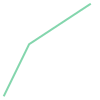

In [14]:
line

In [15]:
print(line)

LINESTRING (-20.13133 28.26548, -19.4553 29.65041, -17.81636 30.72721)


Again, the text representation is in WKT format. WKT is convenient as it is a human-readable text format that also most GIS tools can readily use.

It’s not surprising, but we can see that a `LineString` is constituted of multiple coordinate tuples. In fact, the value(s) of a WKT `LINESTRING` are made up of the values of multiple WKT `POINTS`, joined together with a comma.

Check also the data type:

In [16]:
# Check the data type of a line object 
type(line)

shapely.geometry.linestring.LineString

In [17]:
# Check the geometry type of the line object 
line.geom_type

'LineString'

### `LineString` properties and methods

Linear geometries in their shapely representations (`LineString, LinearRing, MultiLineString`) have a variety of properties and methods that expose useful functionality. For instance, it is possible to access a geometry’s coordinates, calculate its lengths, find its centre point, create points along the line at a specified interval, or compute the closest distance between a line an another geometry.

Fundamentally, accessing the coordinates of a line is very similar as accessing the ones of a point:

In [18]:
# Get coordinate tuples 
list(line.coords)

[(-20.13133, 28.26548), (-19.4553, 29.65041), (-17.81636, 30.72721)]

Because a line has to have at least two coordinate tuples, the list now contains more than the one value we saw earlier with points.

If you would need to access all x-coordinates or all y-coordinates of the line, you can use its xy attribute (an iterator, but, again, for now, we can use them as lists):

In [19]:
# Obtain x and y coordinates 
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

print(xcoords)
print(ycoords)

[-20.13133, -19.4553, -17.81636]
[28.26548, 29.65041, 30.72721]


❗3D-LineStrings 

Note that the `xy` property of shapely geometries does not return `z` values for three-dimensional geometries.

Other properties of lines that are useful for GIS analyses include the length and the center point (_centroid_) of lines: 

In [20]:
# get the length of the line 
line_length = line.length
print(f"Length of our line: {line_length:.1f} units")

Length of our line: 3.5 units


Get the center point of the line 

_Assuming traveling from Bulawayo to Harare was a straight line, this would be the center point of that route_  

In [21]:
# get the center point 
print(line.centroid)

POINT (-19.1451813136879 29.647167814811894)


The centroid (of center point) of a line (or any other shapely geometry) is a `shapely.geometry.Point` object.


## Polygon 

Creating a polygon geometry follows the same logic as creating a point or line geometry. However, the rules for what constitutes a polygon are more complex: It is constructed of exactly one linear ring forming its exterior (perimeter), and any number of additional linear rings forming holes that are cut out of the exterior shell.

Consequently, the `shapely.geometry.Polygon` constructor function accepts two parameters:

> the first one, `shell`, is a list of coordinate tuples, a list of points, or a `LinearRing`, and will form the outer hull of the new polygon. The second, optional, parameter `holes` can be a list of holes to cut out of `shell` (the items in the list can be the same data types as `shell`).

For now, let’s create a simple polygon without any holes. The first example uses **(at least three) coordinate tuples** (three points are required to form a surface):

In [23]:
from shapely.geometry import Polygon

# create a polygon from the coordinates 
polygon1 = Polygon([(-20.13133, 28.26548), (-19.4553, 29.65041), (-17.81636, 30.72721)])

We can also construct the polygon directly from a list of points: 

In [24]:
polygon2 = Polygon([bulawayo, gweru, harare])


… or from a [LinearRing](https://shapely.readthedocs.io/en/stable/manual.html#linearrings) (which has an almost identical behaviour as a `LineString`, except that it is closed, i.e., the first and last point are identical):

In [25]:
from shapely.geometry import LinearRing

shell = LinearRing([bulawayo, gweru, harare, bulawayo])
polygon3 = Polygon(shell)

(When constructing a `shapely.geometry.LinearRing`, you can omit listing the first point again at the end; shapely will then implicitely add the first point another time to the end of the list of points)

We used different methods to construct the three polygons, but we used the same values. Let’s see whether they ended up describing identical geometries:

In [26]:
polygon1 == polygon2 == polygon3

True

Let's also see how the polygon looks like drawn, and what it's text representation is: 

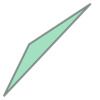

In [27]:
polygon1

In [28]:
print(polygon2)

POLYGON ((-20.13133 28.26548, -19.4553 29.65041, -17.81636 30.72721, -20.13133 28.26548))


Just like with points and lines, the text representation of a `shapely.geometry.Polygon` is in the Well-Known Text format. Note how a WKT `POLYGON` is made up of the values of one or more WKT `LINEARRING`’s values (closed line strings), in parentheses, and joined together by commas. The first linear ring represents the exterior, all following ones holes. (Our example polygon consists of one linear ring, only, so no need for the comma).

Check also the data type:

In [29]:
# Data type 
type(polygon2)

shapely.geometry.polygon.Polygon

In [30]:
# Geometry type 
polygon2.geom_type

'Polygon'

**💡Tip**
> You can always use the built-in `help()` function to find out how a function or class works, which parameters it expects, and what properties and methods you can use:

In [ ]:
# Check the help for Polygon objects: 
help(Polygon)

Let's see how to create a polygon with a hole: 


In [32]:
# define the exterior
outer = LinearRing([(-180, 90), (-180, -90), (180, -90), (180, 90)])

# define a hole:
hole = LinearRing([(-170, 80), (-100, -80), (100, -80), (170, 80)])

Let’s see how the exterior shell and the hole look like on their own:

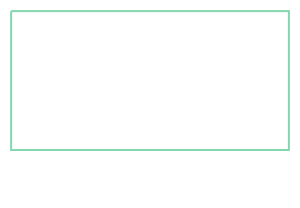

In [33]:
outer

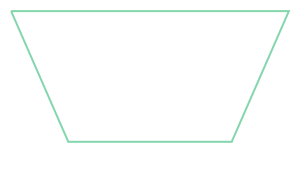

In [34]:
hole

A polygon using only the exterior shell: 

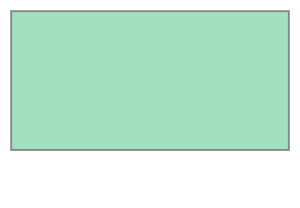

In [35]:
polygon_without_hole = Polygon(outer)
polygon_without_hole

And, finally, a polygon defined by the exterior shell, and one hole (note that `holes` need to be specified as a list):

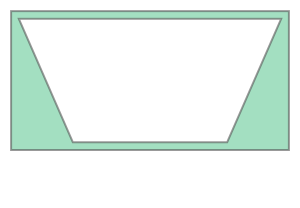

In [36]:
polygon_with_hole = Polygon(outer, [hole])
polygon_with_hole

In [37]:
print(polygon_without_hole)
print(polygon_with_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -100 -80, 100 -80, 170 80, -170 80))


### Polygon properties and methods 

Very similar to lines and points, also `shapely.geometry.Polygons` exposes a number of properties and methods that can be useful for spatial analysis tasks. Consult the [shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html) for a complete list, and see a few examples here:

In [38]:
print(f"Polygon centroid: {polygon_with_hole.centroid}")
print(f"Polygon area: {polygon_with_hole.area}")
print(f"Polygon bounding box: {polygon_with_hole.bounds}")
print(f"Polygon exterior ring: {polygon_with_hole.exterior}")
print(f"Polygon circumference: {polygon_with_hole.exterior.length}")

Polygon centroid: POINT (0 -13.827160493827162)
Polygon area: 21600.0
Polygon bounding box: (-180.0, -90.0, 180.0, 90.0)
Polygon exterior ring: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon circumference: 1080.0


As we can see above, it is again fairly straightforward to access different attributes of `Polygon` objects. Note that distance metrics will make more sense when we start working with data in projected coordinate systems.